In [11]:
import pandas as pd
import numpy as np

In [12]:
df_data=pd.read_csv("data/Social_Network_Ads.csv")

In [13]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [14]:
x=df_data.drop(columns="Purchased")
y=df_data['Purchased']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()

x_tranformed_train= sc.fit_transform(x_train)
x_tranformed_test=sc.transform(x_test)

In [17]:
x_tranformed_train[:5]

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654]])

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knc=KNeighborsClassifier(n_neighbors=5)

knc.fit(x_tranformed_train,y_train)

y_pred=knc.predict(x_tranformed_test)

from sklearn.metrics import f1_score,accuracy_score,mean_squared_error

print(f"F1 score: {f1_score(y_test,y_pred):.2f}")
print(f"Accuracy score: {accuracy_score(y_test,y_pred):.2f}")


F1 score: 0.88
Accuracy score: 0.92


Finding the best value for k

In [19]:
error_train=[]
error_test=[]
for i in range(2,10):
    knc=KNeighborsClassifier(n_neighbors=i)
    knc.fit(x_tranformed_train,y_train)
    y_pred_train=knc.predict(x_tranformed_train)
    # error_train.append(mean_squared_error(y_train,y_pred_train))
    error_train.append(np.mean(y_train!= y_pred_train))
    y_pred_test = knc.predict(x_tranformed_test)
    # error_test.append(mean_squared_error(y_test,y_pred_test))
    error_test.append(np.mean(y_test!= y_pred_test))
    

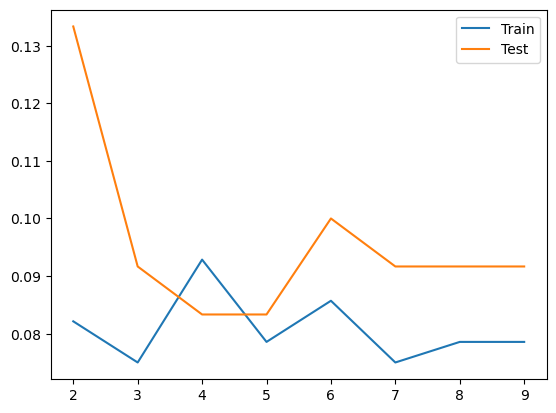

In [20]:
import matplotlib.pyplot as plt

plt.plot(range(2,10), error_train, label="Train")
plt.plot(range(2,10),error_test,label="Test")
plt.legend()
plt.show()

K = 5 where both on test data and train data the mean error is very low